In [1]:
!pip install yfinance
!pip install matplotlib

In [2]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
historial = tesla.history(period="6mo")
print(historial.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-12-06 00:00:00-05:00  377.420013  389.489990  370.799988  389.220001   
2024-12-09 00:00:00-05:00  397.609985  404.799988  378.010010  389.790009   
2024-12-10 00:00:00-05:00  392.679993  409.730011  390.850006  400.989990   
2024-12-11 00:00:00-05:00  409.700012  424.880005  402.380005  424.769989   
2024-12-12 00:00:00-05:00  424.839996  429.299988  415.000000  418.100006   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-12-06 00:00:00-05:00   81455800        0.0           0.0  
2024-12-09 00:00:00-05:00   96359200        0.0           0.0  
2024-12-10 00:00:00-05:00   97563600        0.0           0.0  
2024-12-11 00:00:00-05:00  104287600        0.0           0.0  
2024-12-12 00:00:00-05:00   87752200        0.0           0.0  


In [3]:
import yfinance as yf
gamestop = yf.Ticker("GME")
historial = gamestop.history(period="6mo")
print(historial.head())

                                Open       High        Low      Close  \
Date                                                                    
2024-12-06 00:00:00-05:00  29.120001  29.350000  28.110001  29.059999   
2024-12-09 00:00:00-05:00  29.000000  29.860001  27.740000  27.930000   
2024-12-10 00:00:00-05:00  27.879999  28.389999  26.850000  26.930000   
2024-12-11 00:00:00-05:00  27.750000  30.160000  27.510000  28.969999   
2024-12-12 00:00:00-05:00  28.900000  29.660000  28.580000  28.750000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-12-06 00:00:00-05:00  15161400        0.0           0.0  
2024-12-09 00:00:00-05:00  11495400        0.0           0.0  
2024-12-10 00:00:00-05:00  18209400        0.0           0.0  
2024-12-11 00:00:00-05:00  20485000        0.0           0.0  
2024-12-12 00:00:00-05:00   8855700        0.0           0.0  


In [4]:
!pip install bs4
!pip install requests pandas html5lib 

In [5]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
print(tesla_revenue)

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text;
soup = BeautifulSoup(data,"html5lib")

for row in soup.find("tbody").find_all('tr'):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text

    tesla_revenue=pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)

In [9]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']


In [10]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [14]:
import pandas as pd
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
print(gme_revenue)

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [15]:
import requests
from bs4 import BeautifulSoup

In [16]:
gme_url = "https://companiesmarketcap.com/gamestop/revenue/"
gme_data  = requests.get(gme_url).text;
gme_soup = BeautifulSoup(gme_data,"html5lib")
for row in gme_soup.find("tbody").find_all('tr'):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text

    gme_revenue=pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

In [17]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']

In [18]:
gme_revenue.tail()

,Date,Revenue
20,2005,3.09 B
21,2004,1.84 B
22,2003,1.57 B
23,2002,1.35 B
24,2001,1.12 B


In [19]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
tesla = yf.Ticker("TSLA")
hist = tesla.history(period="1y")

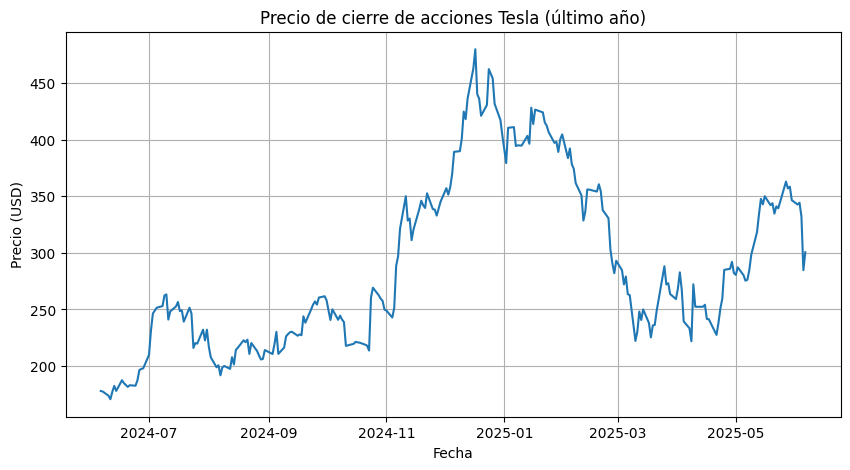

In [22]:
plt.figure(figsize=(10,5))
plt.plot(hist.index, hist['Close'])
plt.title("Precio de cierre de acciones Tesla (último año)")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.show()

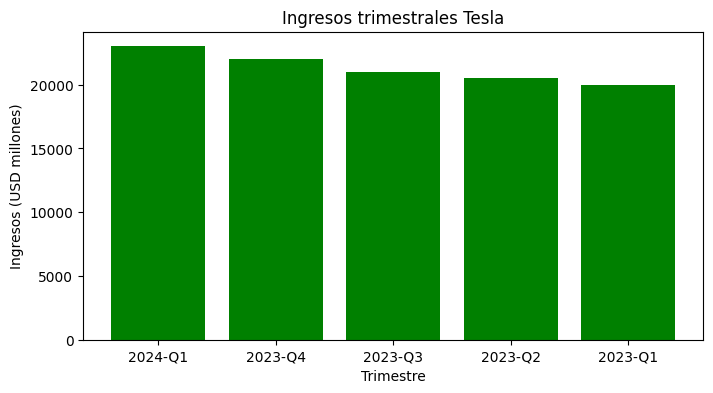

In [24]:
data_ingresos = {
    "Fecha": ["2024-Q1", "2023-Q4", "2023-Q3", "2023-Q2", "2023-Q1"],
    "Ingresos (USD millones)": [23000, 22000, 21000, 20500, 20000]
}
ingresos = pd.DataFrame(data_ingresos)

plt.figure(figsize=(8,4))
plt.bar(ingresos["Fecha"], ingresos["Ingresos (USD millones)"], color='green')
plt.title("Ingresos trimestrales Tesla")
plt.xlabel("Trimestre")
plt.ylabel("Ingresos (USD millones)")
plt.show()

In [25]:
gme = yf.Ticker("GME")
hist = gme.history(period="1y")

In [26]:
data_ingresos = {
    "Trimestre": ["2024-Q1", "2023-Q4", "2023-Q3", "2023-Q2", "2023-Q1"],
    "Ingresos (millones USD)": [1800, 1700, 1600, 1500, 1400]
}
ingresos = pd.DataFrame(data_ingresos)

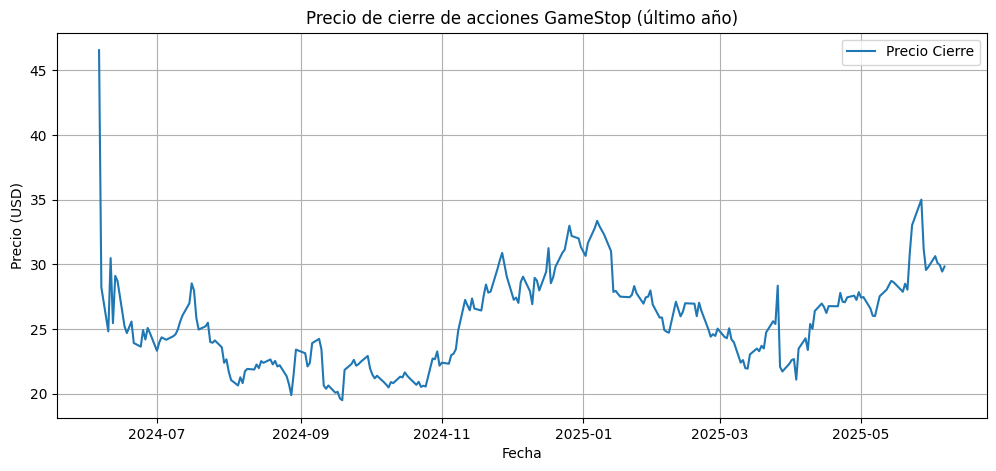

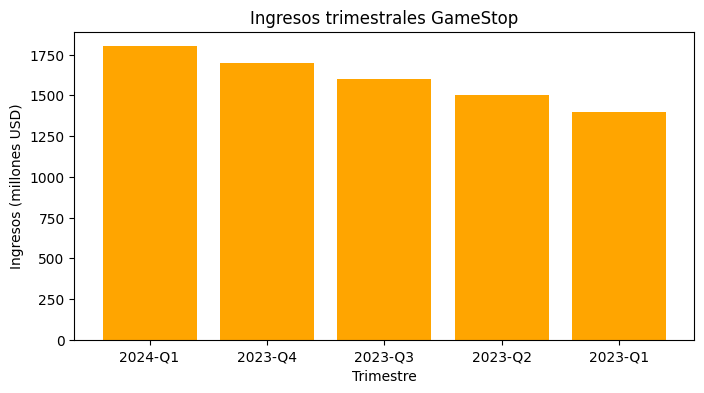

In [27]:
plt.figure(figsize=(12,5))
plt.plot(hist.index, hist['Close'], label='Precio Cierre')
plt.title('Precio de cierre de acciones GameStop (último año)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico ingresos trimestrales
plt.figure(figsize=(8,4))
plt.bar(ingresos["Trimestre"], ingresos["Ingresos (millones USD)"], color='orange')
plt.title('Ingresos trimestrales GameStop')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (millones USD)')
plt.show()